To initialize these weights in NumPy, we have to provide the shape of the matrix. 
If features is a 2D array containing the input data:

In [ ]:
# Number of records and input units
n_records, n_inputs = features.shape

# Number of hidden units
n_hidden = 2
weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))

#This creates a 2D array (i.e. a matrix) named weights_input_to_hidden with dimensions n_inputs by n_hidden. 
Remember how the input to a hidden unit is the sum of all the inputs multiplied by the hidden unit's weights. 
So for each hidden layer unit, hj we need to calculate the following:
    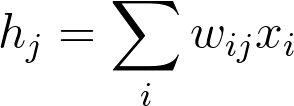
    
For this part though, you'll only need to know how to multiply a matrix with a vector.

In this case, we're multiplying the inputs (a row vector here) by the weights. To do this, you take the dot (inner) product of the inputs with each column in the weights matrix. For example, to calculate the input to the first hidden unit, j = 1j=1, you'd take the dot product of the inputs with the first column of the weights matrix.

h1 = x1w11 + x1w21 + x1w31

And for the second hidden layer input, you calculate the dot product of the inputs with the second column. And so on and so forth.

In NumPy, you can do this for all the inputs and all the outputs at once using np.dot
hidden_inputs = np.dot(inputs, weights_input_to_hidden)



The important thing with matrix multiplication is that the dimensions match. 
For matrix multiplication to work, there has to be the same number of elements in the dot products. In the first example, there are three columns in the input vector, and three rows in the weights matrix. In the second example, there are three columns in the weights matrix and three rows in the input vector. 
If the dimensions don't match, you'll get this:

#Same weights and features as above, but swapped the order
hidden_inputs = np.dot(weights_input_to_hidden, features)
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-11-1bfa0f615c45> in <module>()
----> 1 hidden_in = np.dot(weights_input_to_hidden, X)

ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)


The dot product can't be computed for a 3x2 matrix and 3-element array. That's because the 2 columns in the matrix don't match the number of elements in the array. 
The rule is that if you're multiplying an array from the left, the array must have the same number of elements as there are rows in the matrix. And if you're multiplying the matrix from the left, the number of columns in the matrix must equal the number of elements in the array on the right.

Making a column vector

You see above that sometimes you'll want a column vector, even though by default NumPy arrays work like row vectors. It's possible to get the transpose of an array like so arr.T, but for a 1D array, the transpose will return a row vector. Instead, use arr[:,None] to create a column vector:

print(features)
> array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features.T)
> array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features[:, None])
> array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

Alternatively, you can create arrays with two dimensions. Then, you can use arr.T to get the column vector.

np.array(features, ndmin=2)
> array([[ 0.49671415, -0.1382643 ,  0.64768854]])

np.array(features, ndmin=2).T
> array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

# Programming quiz
Below, you'll implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers.

Things to do:

Calculate the input to the hidden layer.
Calculate the hidden layer output.
Calculate the input to the output layer.
Calculate the output of the network.

In [7]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)
X

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

In [8]:
weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

In [9]:
# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X,weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]


In [10]:
output_layer_in = np.dot(hidden_layer_out,weights_hidden_to_output )
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Output-layer Output:
[0.49815196 0.48539772]
